# Time map of chord events

Goal: compute and visualize a time map of chord events.

This provides an overview of timing of events without the need of zooming the plot.

[Time Maps: Visualizing Discrete Events Across Many Timescales](https://districtdatalabs.silvrback.com/time-maps-visualizing-discrete-events-across-many-timescales) by Max Watson.

## Dataset

Reference Annotations: The Beatles

- http://isophonics.net/content/reference-annotations-beatles

### Format
- TSV file, each line describes a single segment with a chord
- columns: `start_time end_time mirex_chord_label`
- example: `2.9632 6.1260 G:sus4(b7)`
- time is in float seconds
- label syntax: https://code.soundsoftware.ac.uk/attachments/download/330/chris_harte_phd_thesis.pdf

## Output:

- time map on:
  - the whole dataset
  - each song
  - blocks of a single song (how the distribution changes)
- plot type/scale:
  - scatter plot, 2D histogram plot
  - linear scale

In [1]:
%pylab inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pylab.rcParams['figure.figsize'] = (16, 12)

Populating the interactive namespace from numpy and matplotlib


In [3]:
data_dir = 'data/beatles/chordlab/The_Beatles/'

In [4]:
file = "03_-_A_Hard_Day's_Night/03_-_If_I_Fell.lab"
def read_chord_file(path):
    return pd.read_csv(path, sep=' ', header=None, names=['start','end','chord'])
df = read_chord_file(data_dir + file)

In [5]:
df.head()

,start,end,chord
0,0.000000,0.440395,N
1,0.440395,1.021603,N
2,1.021603,3.204279,Eb:min
3,3.204279,5.456615,D
4,5.456615,7.697340,Db


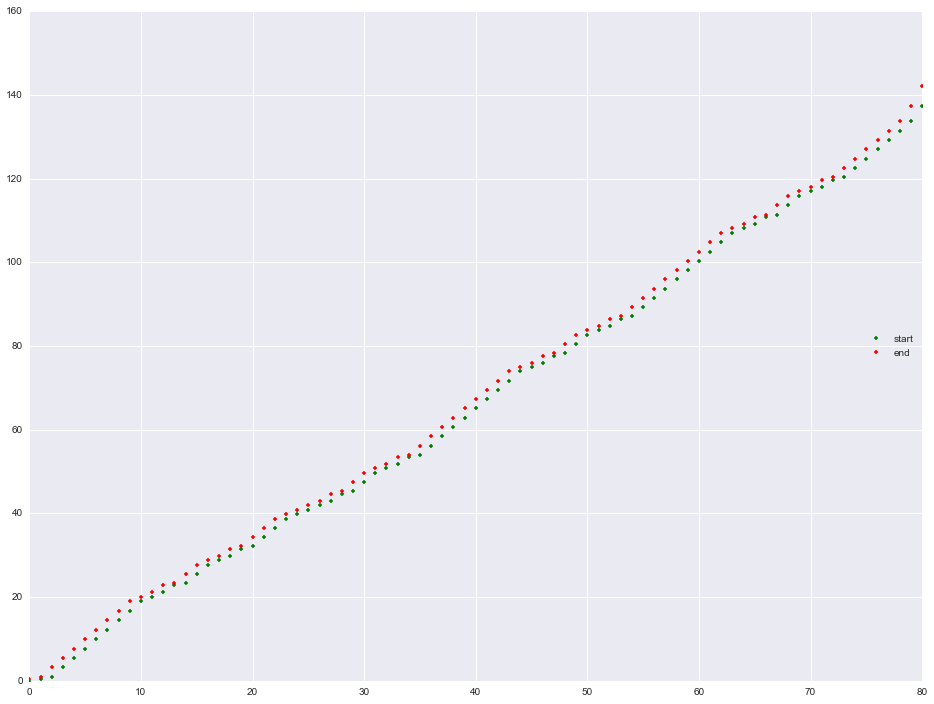

In [6]:
plot(df['start'], 'g.', label='start')
plot(df['end'], 'r.', label='end')
legend(loc='center right');

In [7]:
print('event count:', len(df))
print('total time:', df['end'].iloc[-1])
print('last start event time:', df['start'].iloc[-1])

event count: 81
total time: 142.053878
last start event time: 137.345815


In [8]:
df['duration'] = df['end'] - df['start']
df['duration'].describe()

count    81.000000
mean      1.753752
std       0.741541
min       0.440395
25%       1.114558
50%       2.159456
75%       2.229116
max       4.708063
Name: duration, dtype: float64

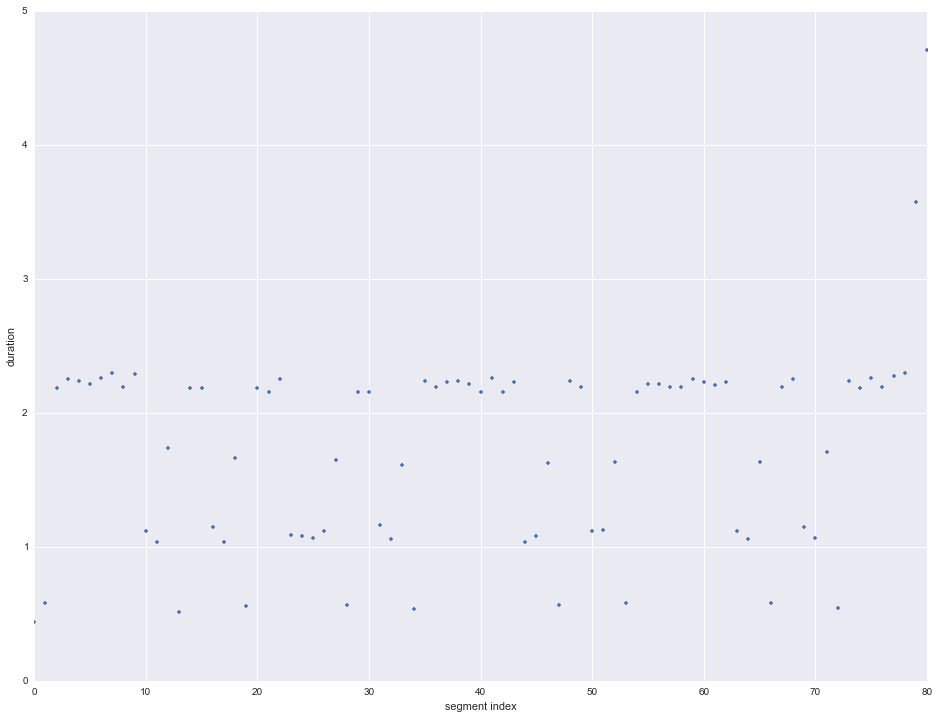

In [9]:
plot(df['duration'], '.')
xlabel('segment index')
ylabel('duration');

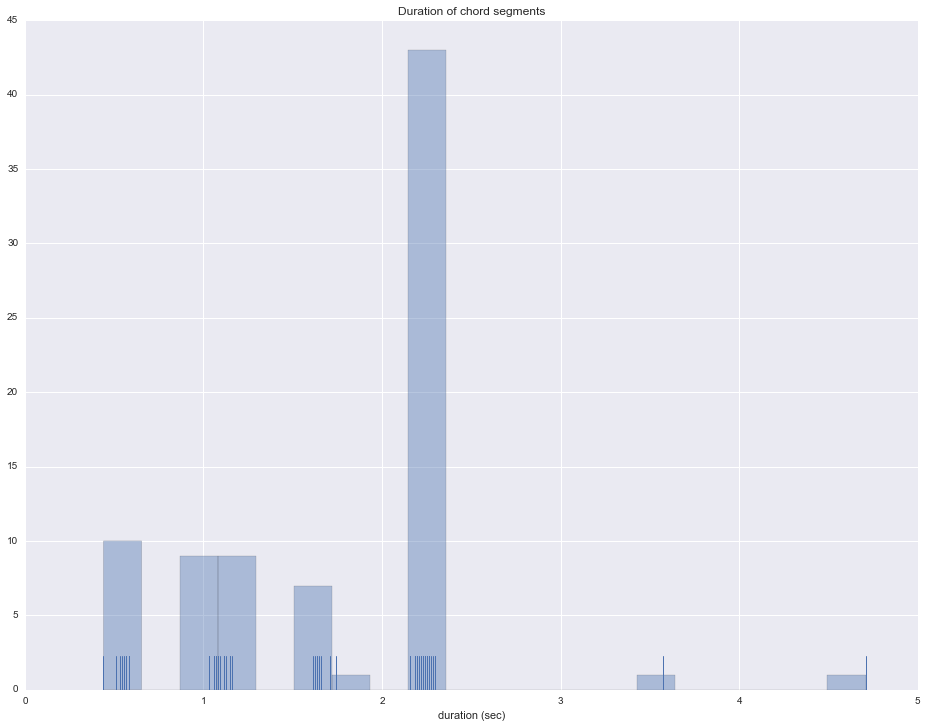

In [11]:
sns.distplot(df['duration'], axlabel='duration (sec)', rug=True, kde=False, bins=20)
title('Duration of chord segments');

Time map is just a scatter plot of time to previous event vs. time to next event. Let's compute the differences.

In [12]:
def add_differences(df, col='start'):
    df['prev'] = df[col].diff(1)
    df['next'] = -df[col].diff(-1)
    return df
df_diff = add_differences(df).dropna()

In [13]:
df_diff.head()

,start,end,chord,duration,prev,next
1,0.440395,1.021603,N,0.581208,0.440395,0.581208
2,1.021603,3.204279,Eb:min,2.182676,0.581208,2.182676
3,3.204279,5.456615,D,2.252336,2.182676,2.252336
4,5.456615,7.697340,Db,2.240725,2.252336,2.240725
5,7.697340,9.914846,Bb:min,2.217506,2.240725,2.217506


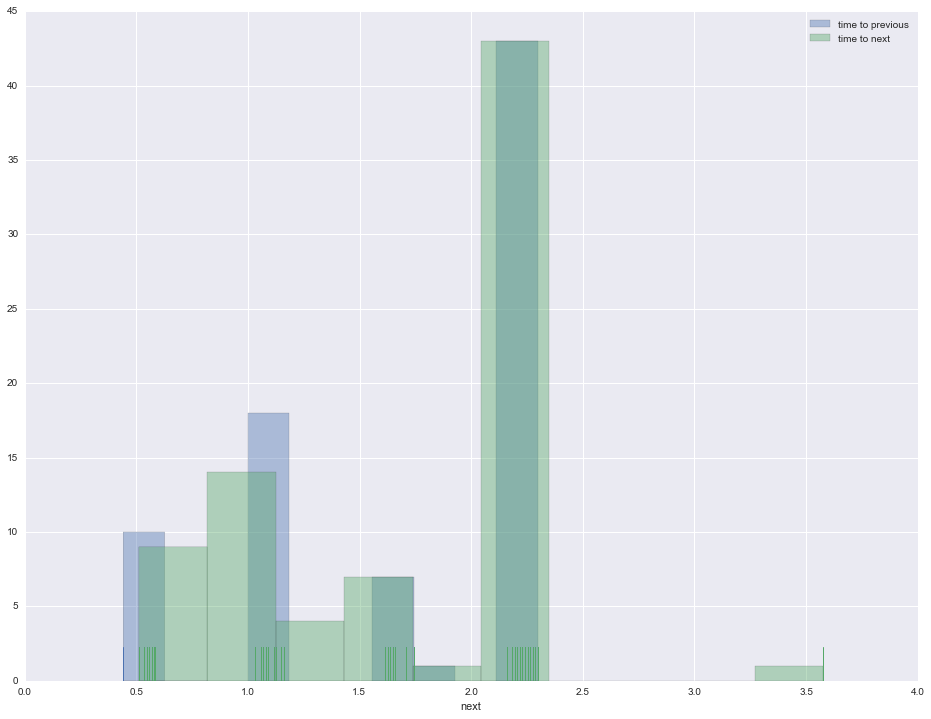

In [14]:
sns.distplot(df_diff['prev'], label='time to previous', rug=True, kde=False, bins=10)
sns.distplot(df_diff['next'], label='time to next', rug=True, kde=False, bins=10)
legend();

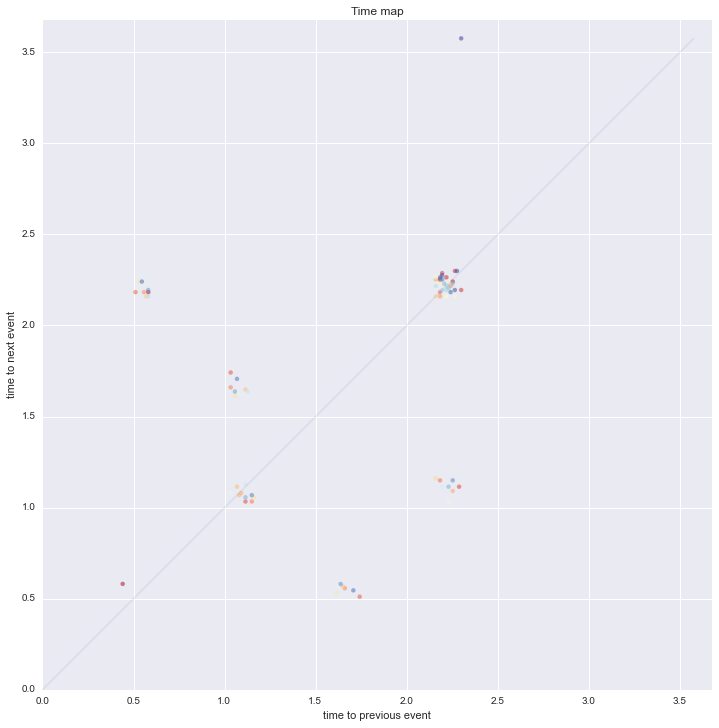

In [15]:
def plot_time_map(df_diff, coloring=None):
    cmap = plt.cm.get_cmap('RdYlBu')
    c = np.linspace(0, 1, len(df_diff)) if coloring is None else coloring
    scatter(df_diff['prev'], df_diff['next'],
            alpha=0.5,
            c=c,
            cmap=cmap,
            edgecolors='none')
    xlabel('time to previous event')
    ylabel('time to next event')
    title('Time map')
    axes().set_aspect('equal')
    
    max_value = df_diff[['prev','next']].max().max()
    plot([0, max_value], [0, max_value], alpha=0.1);
    xlim([0, max_value+0.1])
    ylim([0, max_value+0.1])

plot_time_map(df_diff);

In [16]:
def unique_chords(df):
    return sorted(df['chord'].unique())

for chord in unique_chords(df):
    print(chord)

A
A:7
Bb:min
D
D:9
Db
E:min
E:min7
Eb:min
F#:min
F:dim
G
G:min
N


In [17]:
import glob

In [18]:
files = glob.glob(data_dir + '*/*.lab')
tracks = pd.DataFrame({
    'album': [f.split('/')[-2].replace('_', ' ') for f in files],
    'name': [f.split('/')[-1].replace('.lab', '').replace('_', ' ') for f in files],
    'album_index': [int(f.split('/')[-2][:2]) for f in files]#,
#     'song_index': [int(f.split('/')[-1][:2]) for f in files]
})
tracks

,album,album_index,name
0,01 - Please Please Me,1,01 - I Saw Her Standing There
1,01 - Please Please Me,1,02 - Misery
2,01 - Please Please Me,1,03 - Anna (Go To Him)
3,01 - Please Please Me,1,04 - Chains
4,01 - Please Please Me,1,05 - Boys
5,01 - Please Please Me,1,06 - Ask Me Why
6,01 - Please Please Me,1,07 - Please Please Me
7,01 - Please Please Me,1,08 - Love Me Do
8,01 - Please Please Me,1,09 - P. S. I Love You
9,01 - Please Please Me,1,10 - Baby It's You


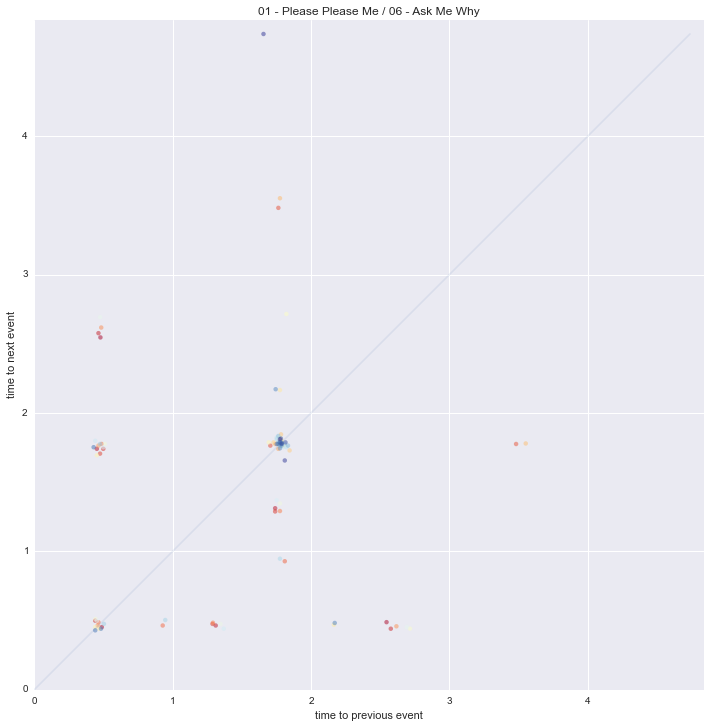

In [19]:
def song_title(track):
    return ' / '.join(track[['album', 'name']])

def time_map_for_file(index):
    plot_time_map(add_differences(read_chord_file(files[index])).dropna())
    title(song_title(tracks.ix[index]))
    
time_map_for_file(5)

In [20]:
def add_track_id(df, track_id):
    df['track_id'] = track_id
    return df

selected_files = files
track_dfs = (read_chord_file(file) for file in selected_files)
track_dfs = (add_track_id(df, track_id) for (track_id, df) in enumerate(track_dfs))
track_dfs = (add_differences(df) for df in track_dfs)
all_events = pd.concat(track_dfs)
df_diff_all = all_events.dropna()

In [21]:
df_diff_all.head()

,start,end,chord,track_id,prev,next
1,2.612267,11.459070,E,0,2.612267,8.846803
2,11.459070,12.921927,A,0,8.846803,1.462857
3,12.921927,17.443474,E,0,1.462857,4.521547
4,17.443474,20.410362,B,0,4.521547,2.966888
5,20.410362,21.908049,E,0,2.966888,1.497687


In [22]:
print('song count:', len(selected_files))
print('total diff event count in all songs:', len(df_diff_all))

song count: 180
total diff event count in all songs: 14261


In [23]:
df_diff_all.describe()

,start,end,track_id,prev,next
count,14261.000000,14261.000000,14261.000000,14261.000000,14261.000000
mean,83.139702,85.129384,92.405021,1.927003,1.989706
std,60.706115,60.872413,51.275076,2.154930,2.509577
min,0.016849,0.588571,0.000000,0.016849,0.174149
25%,37.196780,39.213265,48.000000,1.056508,1.068118
50%,76.574683,78.513038,96.000000,1.602177,1.625397
75%,116.512494,118.346870,137.000000,2.101405,2.113016
max,463.650816,464.089225,179.000000,137.422406,137.422406


In [24]:
def outlier_quantiles(df, cols=['next','prev'], tolerance=0.01):
    df_nonzero = df[cols][df[cols] > 0]
    quantiles = df_nonzero.quantile([tolerance, 1 - tolerance])
    return quantiles

outlier_limits = outlier_quantiles(df_diff_all)
outlier_limits

,next,prev
0.01,0.399945,0.382953
0.99,8.712735,7.969089


In [25]:
def remove_outliers(df, limits, cols=['next','prev']):
    outlier_idxs = df['next'] == np.nan # just an array of False of proper length
    for col in cols:
        q_min, q_max = limits[col]
        print(q_min, q_max)
        series = df[col]
        idxs = series < q_min
        print(col, 'min', sum(idxs))
        outlier_idxs |= idxs
        idxs = series > q_max
        outlier_idxs |= idxs
        print(col, 'max', sum(idxs))
    print('outlier count:', sum(outlier_idxs), 'precentage:', sum(outlier_idxs) / len(df) * 100, '%')
    return df[~outlier_idxs]

In [26]:
df_diff_all_cleaned = remove_outliers(df_diff_all, outlier_limits)

0.3999454 8.7127348
next min 143
next max 143
0.3829526 7.9690886
prev min 143
prev max 143
outlier count: 500 precentage: 3.5060654933 %


In [27]:
df_diff_all_cleaned.describe()

,start,end,track_id,prev,next
count,13761.000000,13761.000000,13761.000000,13761.000000,13761.000000
mean,82.596051,84.429345,91.645593,1.804003,1.833320
std,59.044921,59.069297,51.254232,1.108989,1.132817
min,0.402100,0.866546,0.000000,0.382953,0.400605
25%,37.680748,39.503514,48.000000,1.068118,1.079728
50%,76.570952,78.396938,95.000000,1.602177,1.625397
75%,116.034524,117.812811,136.000000,2.078186,2.100796
max,463.650816,464.089225,179.000000,7.964445,8.693016


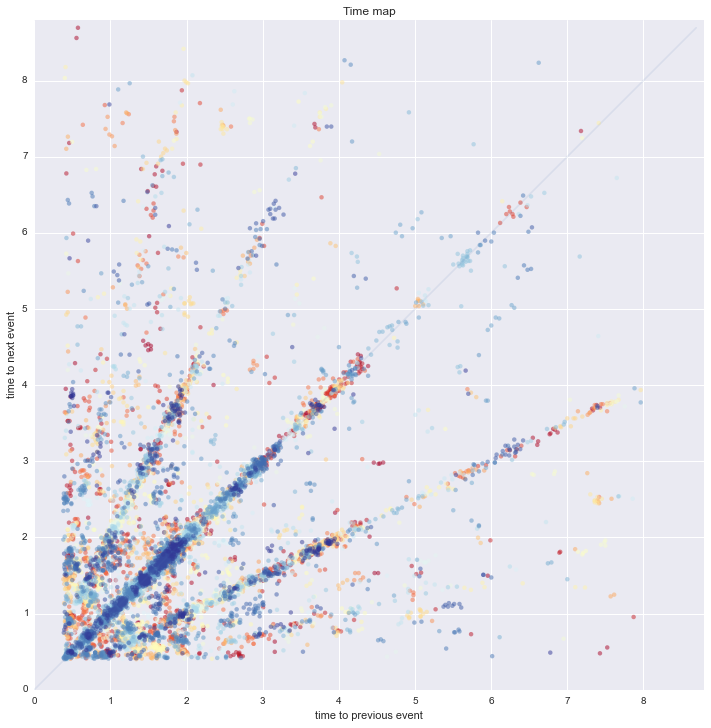

In [28]:
plot_time_map(df_diff_all_cleaned, coloring=df_diff_all_cleaned['track_id'])

It seems that velocity is represented by radius and acceleration by angle with range (0, pi/2).

Thus it might make sense to transform the time map via inverse polar transform so that velocity and acceleration are on cartesian coordinates.

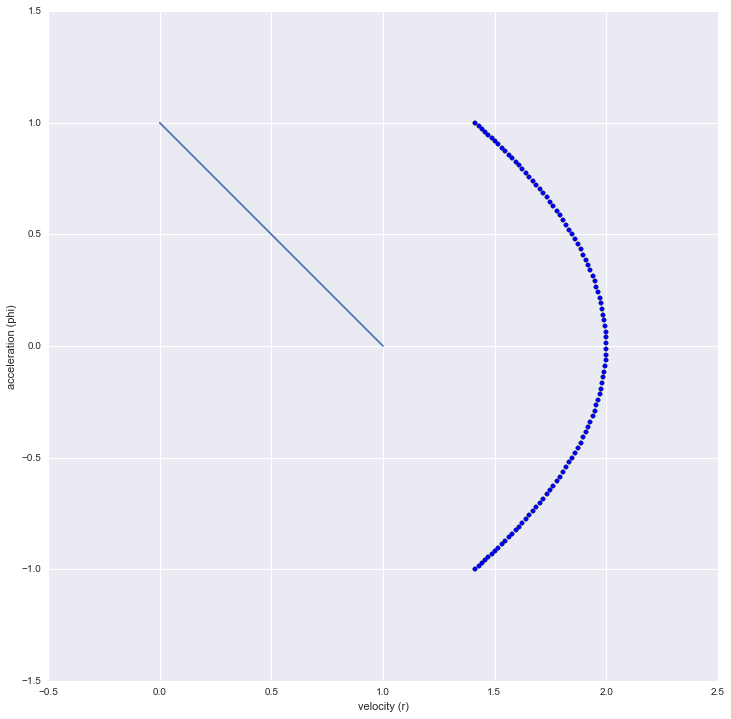

In [29]:
def inverse_polar(time_to_prev, time_to_next):
    # x = time_to_prev
    # y = time_to_next
    # (x, y) -> (r, phi) (cartesian to polar)
    # (r, phi) -> (velocity, acceleration) (no transform, just different interpretation)
    r = np.sqrt(time_to_prev**2 + time_to_next**2)
    phi = np.angle(time_to_next + 1j * time_to_prev) / (2 * np.pi)
    return (1 / (r / np.sqrt(2)), (phi - 0.125) * 8)

x = np.linspace(0, 1, 100)
plot(x, 1 - x)
scatter(*inverse_polar(x, 1 - x))
xlabel('velocity (r)')
ylabel('acceleration (phi)')
axes().set_aspect('equal');

In [30]:
def plot_inverse_polar_time_map(df_diff, coloring=None):
    cmap = plt.cm.get_cmap('RdYlBu')
    velocity, acceleration = inverse_polar(df_diff['prev'], df_diff['next'])
    c = np.linspace(0, 1, len(df_diff)) if coloring is None else coloring
    scatter(velocity, acceleration,
            alpha=0.5,
            c=c,
            cmap=cmap,
            edgecolors='none')
    xlabel('velocity')
    ylabel('acceleration')
    title('Time map')
    axes().set_aspect('equal')
    
    max_velocity = velocity.max()
    plot([0, 0], [max_velocity, 0], alpha=0.2);
    xlim([0, max_velocity+0.1])
    ylim([-1, 1])

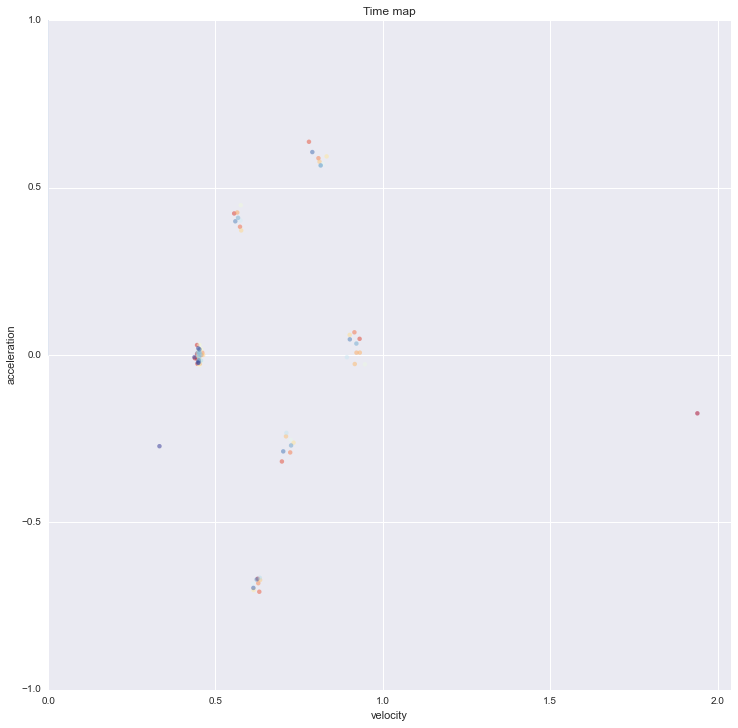

In [31]:
plot_inverse_polar_time_map(df_diff);

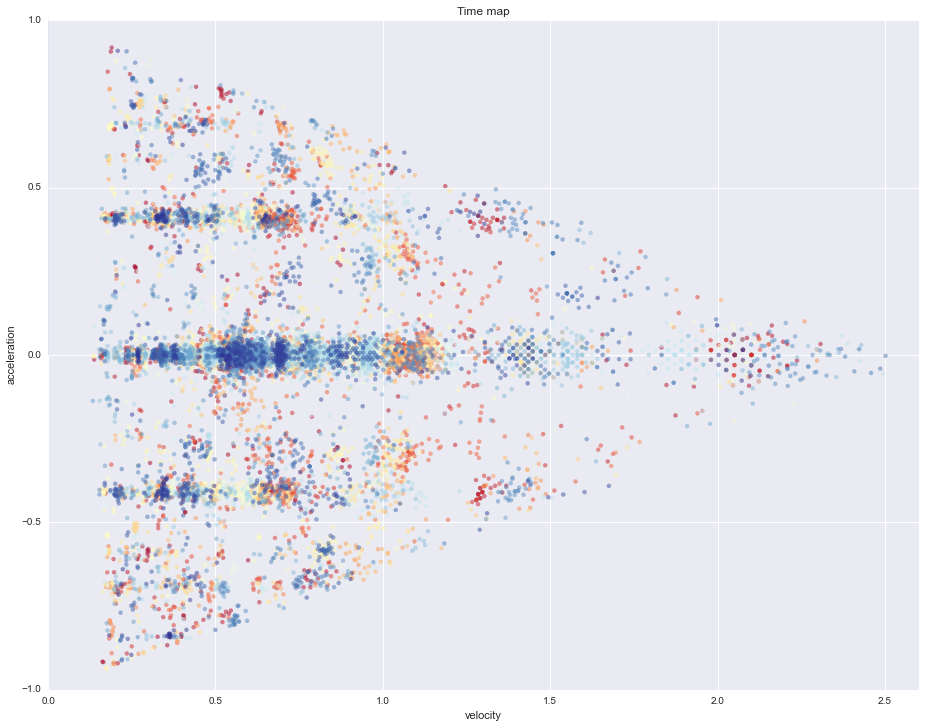

In [32]:
plot_inverse_polar_time_map(df_diff_all_cleaned);

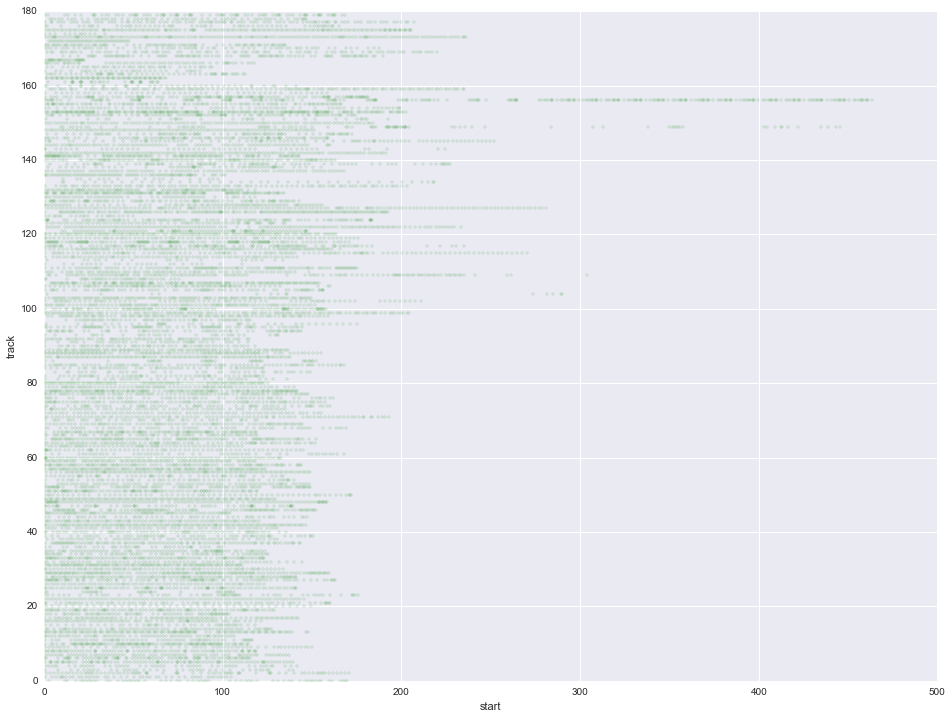

In [33]:
def plot_tracks(df, col, track_order=None):
    track_id = df['track_id']
    y = track_id
    if track_order is not None:
        mapping = track_order.argsort()
        y = y.apply(lambda x: mapping[x])
    plot(df[col], y, 'g.', label=col, alpha=0.1)
    xlabel(col)
    ylabel('track')

plot_tracks(df_diff_all, 'start')

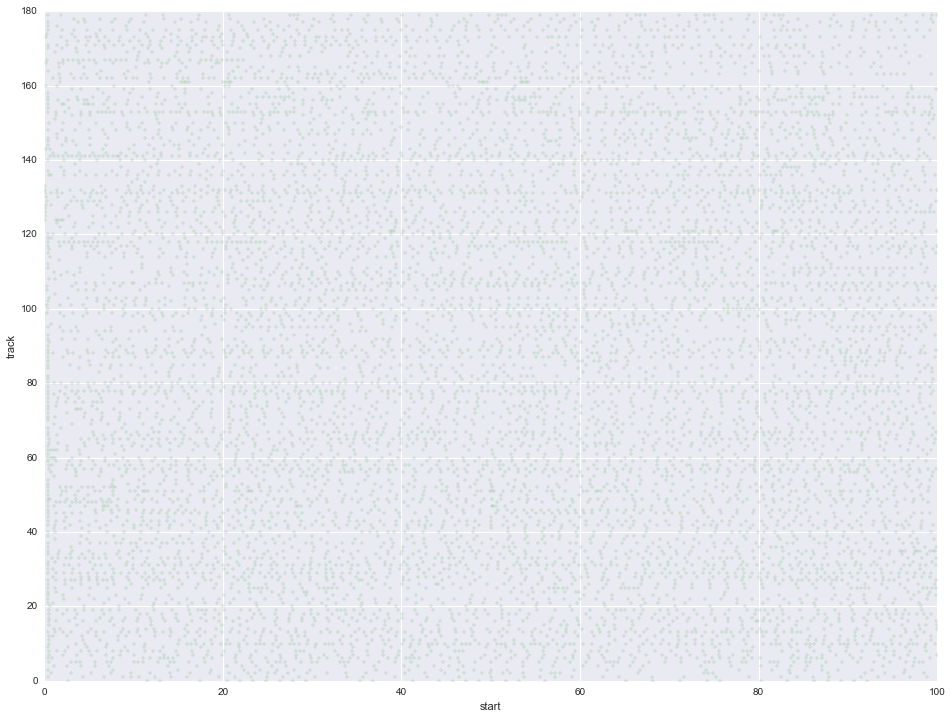

In [34]:
def select_time_range(df, start, end, col='start'):
    series = df[col]
    return df[(series >= start) & (series <= end)]

plot_tracks(select_time_range(df_diff_all, 0, 100), 'start')

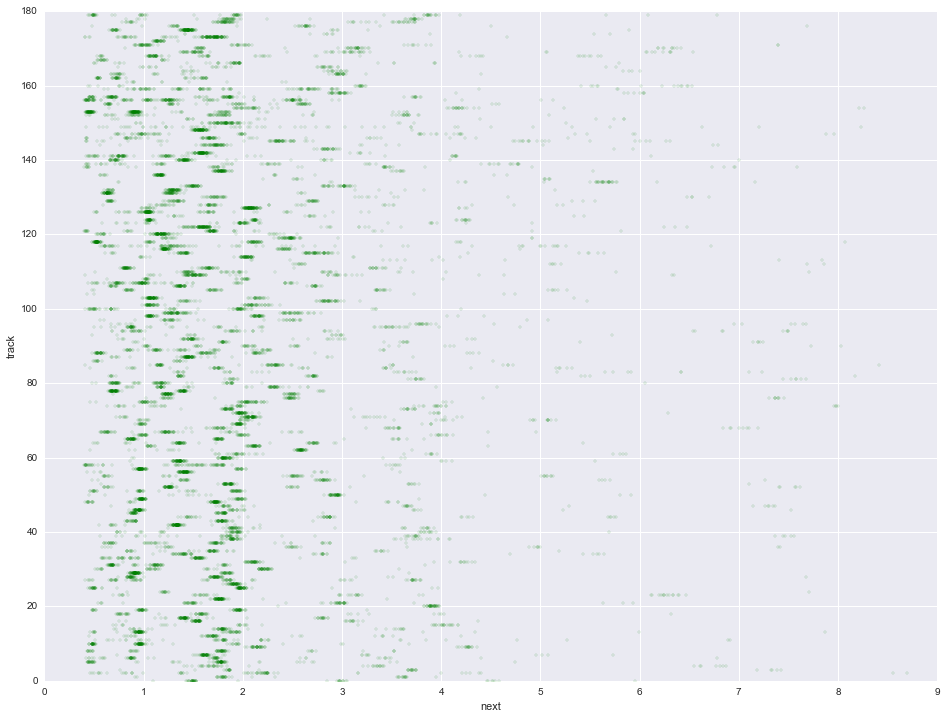

In [35]:
plot_tracks(df_diff_all_cleaned, 'next')

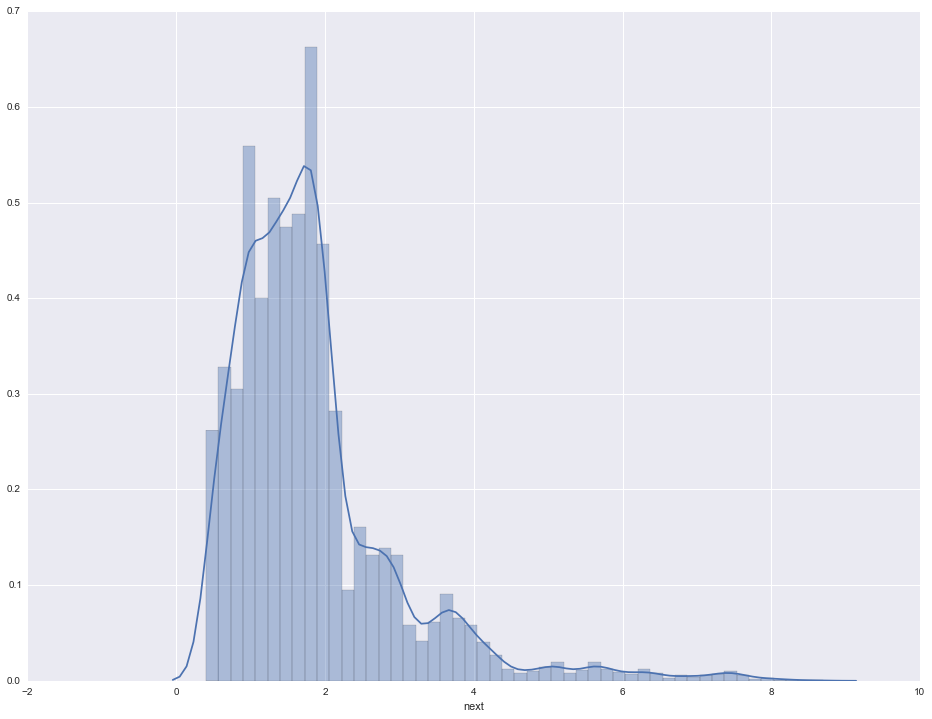

In [36]:
sns.distplot(df_diff_all_cleaned['next']);

In [37]:
next_medians = df_diff_all.groupby('track_id')['next'].median()
next_medians.describe()

count    180.000000
mean       1.908445
std        0.888875
min        0.574694
25%        1.364172
50%        1.764717
75%        2.105760
max        6.251631
Name: next, dtype: float64

In [38]:
tracks['next_median'] = next_medians
tracks_by_next_median = next_medians.argsort()
tracks.ix[tracks_by_next_median]

,album,album_index,name,next_median
118,09 - Magical Mystery Tour,9,09 - Penny Lane,0.574694
167,11 - Abbey Road,11,17 - Her Majesty,0.603719
131,10CD1 - The Beatles,10,CD1 - 11 - Black Bird,0.672859
78,06 - Rubber Soul,6,10 - I'm Looking Through You,0.731429
162,11 - Abbey Road,11,12 - Polythene Pam,0.731429
141,10CD2 - The Beatles,10,CD2 - 04 - Everybody's Got Something To Hide E...,0.801089
153,11 - Abbey Road,11,03 - Maxwell's Silver Hammer,0.901073
161,11 - Abbey Road,11,11 - Mean Mr Mustard,0.905578
65,05 - Help!,5,11 - Tell Me What You See,0.917189
29,03 - A Hard Day's Night,3,02 - I Should Have Known Better,0.928798


Tracks ordered by median time difference between events.

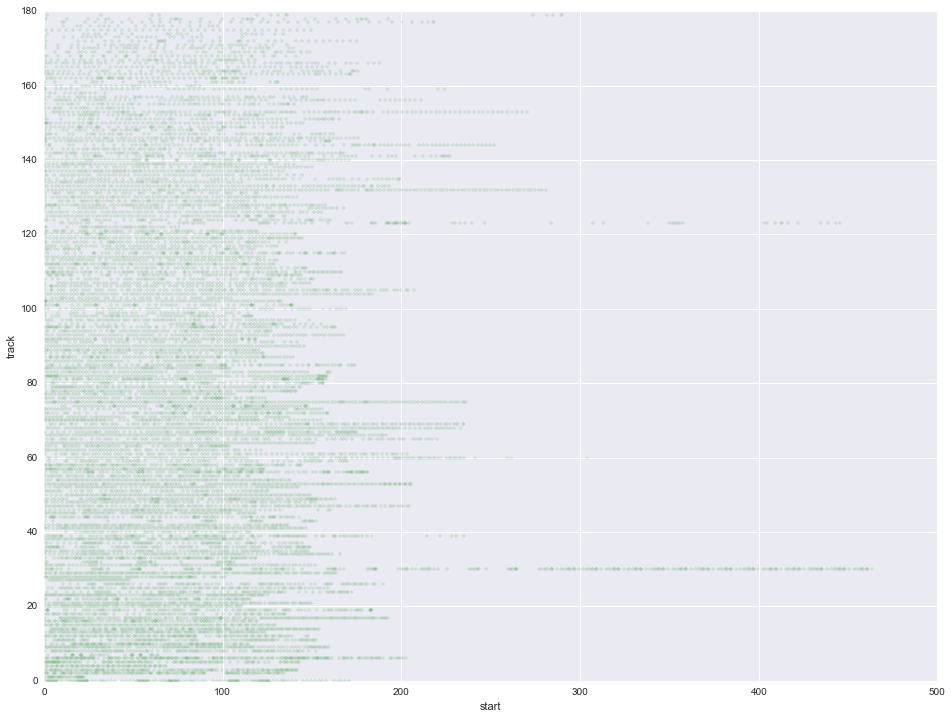

In [39]:
plot_tracks(df_diff_all, 'start', tracks_by_next_median)

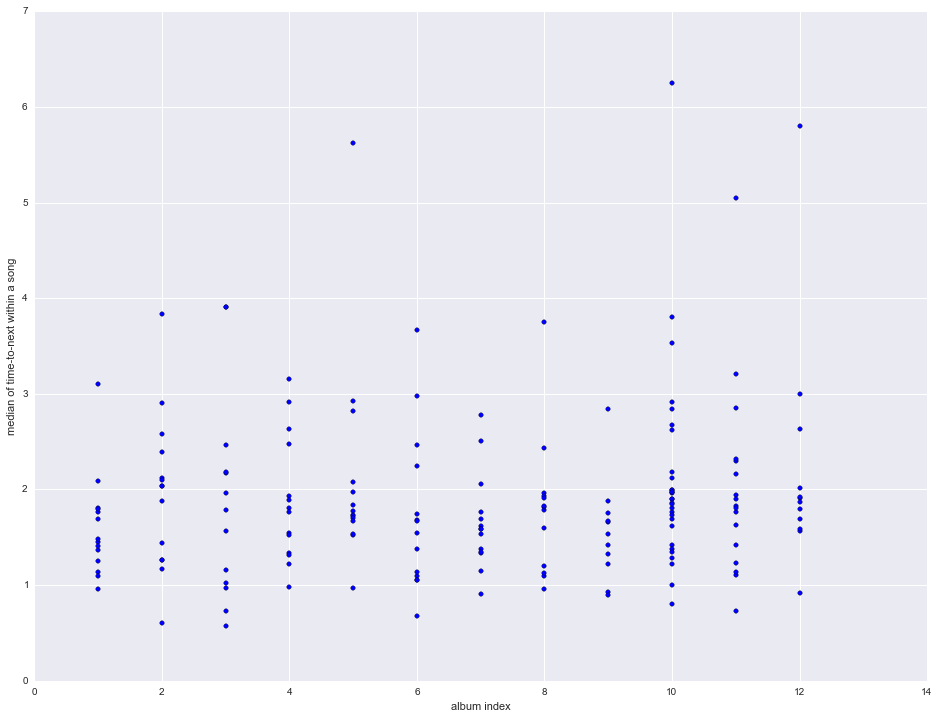

In [40]:
scatter(tracks.ix[tracks_by_next_median]['album_index'], next_medians)
xlabel('album index')
ylabel('median of time-to-next within a song');

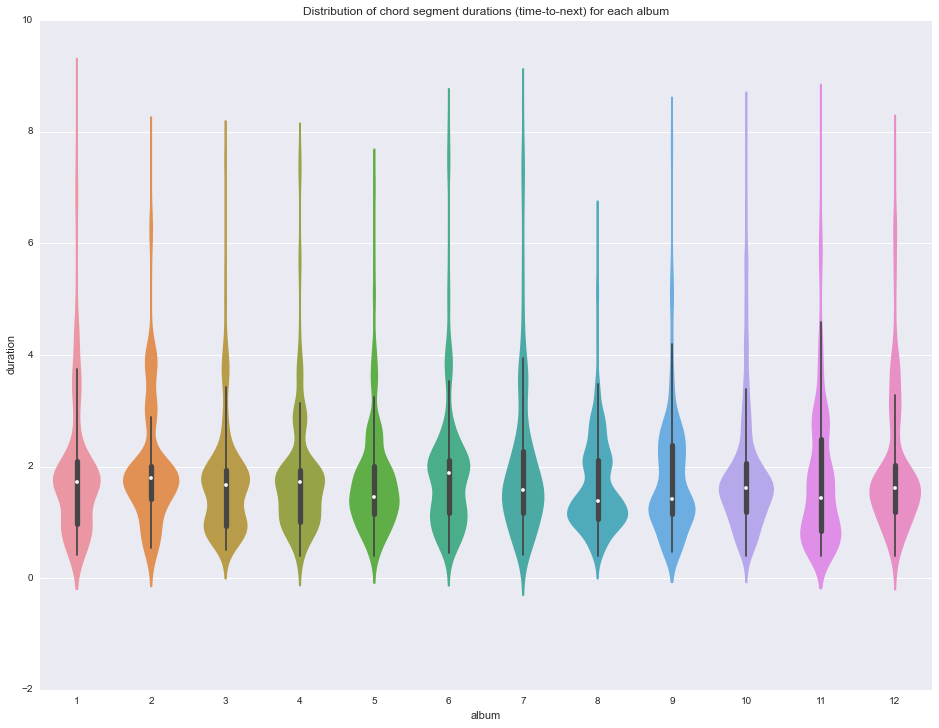

In [80]:
df = pd.DataFrame({
        'album': list(tracks['album_index'][df_diff_all_cleaned['track_id']]),
        'duration': list(df_diff_all_cleaned['next'])})
sns.violinplot(data=df, x='album', y='duration')
title('Distribution of chord segment durations (time-to-next) for each album');

Songs ordered by total length.

In [157]:
total_lengths = df_diff_all.groupby('track_id').last()['end']

In [215]:
# indexes of last songs in each album
last_song_indexes = list(tracks[tracks['album_index'].diff() != 0].index)

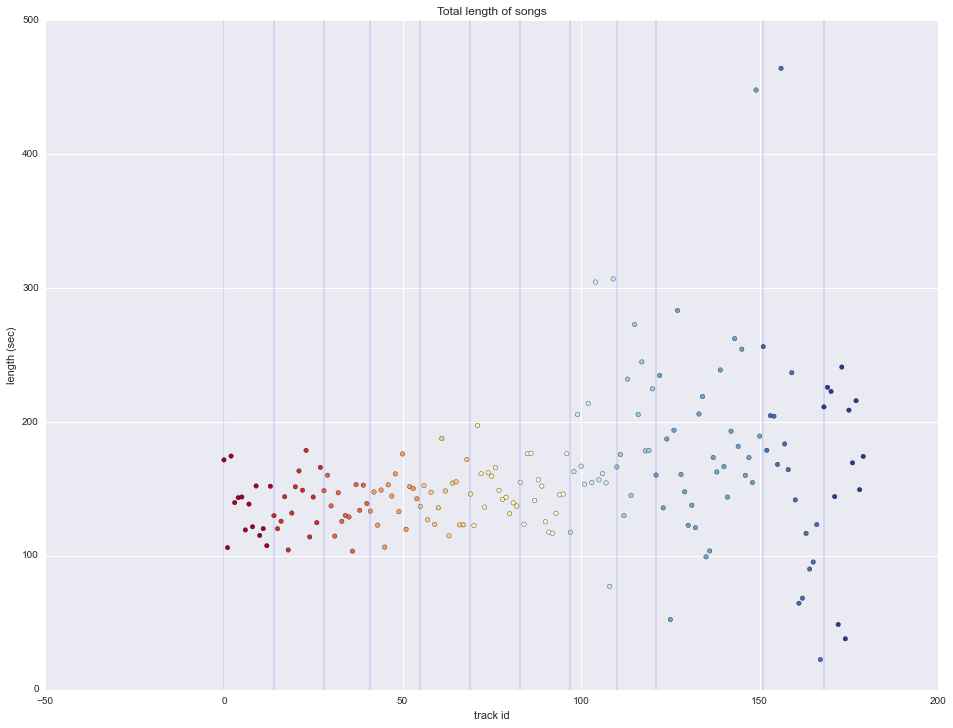

In [217]:
scatter(np.arange(len(total_lengths)), total_lengths, c=tracks['album_index'], cmap=plt.cm.get_cmap('RdYlBu'))
for i in last_song_indexes:
    axvline(i, alpha=0.1)
title('Total length of songs')
xlabel('track id')
ylabel('length (sec)');

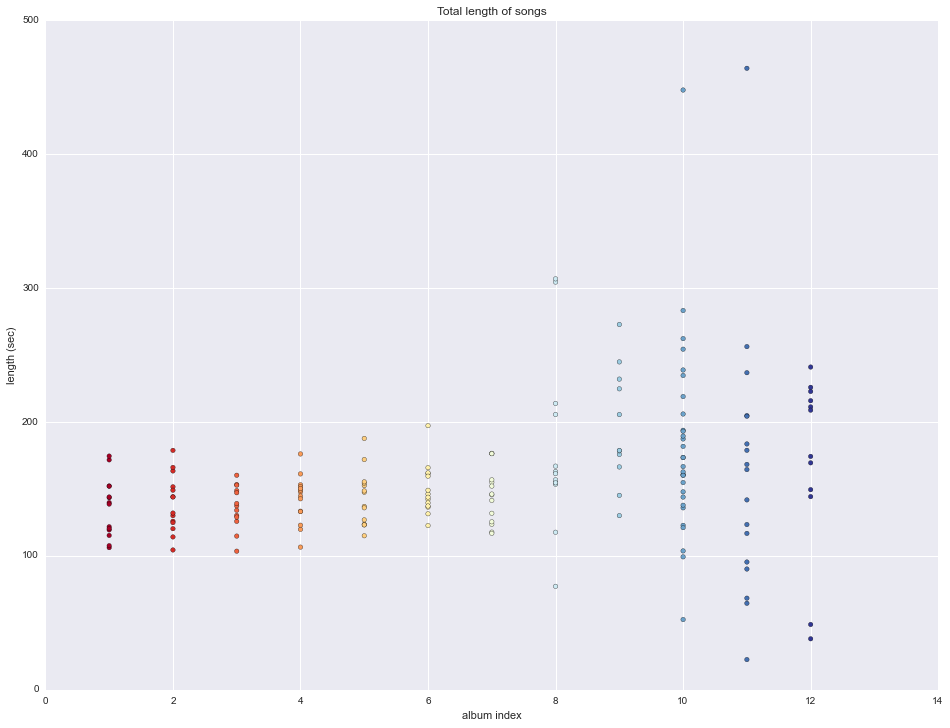

In [221]:
scatter(tracks['album_index'], total_lengths, c=tracks['album_index'], cmap=plt.cm.get_cmap('RdYlBu'))
title('Total length of songs')
xlabel('album index')
ylabel('length (sec)');

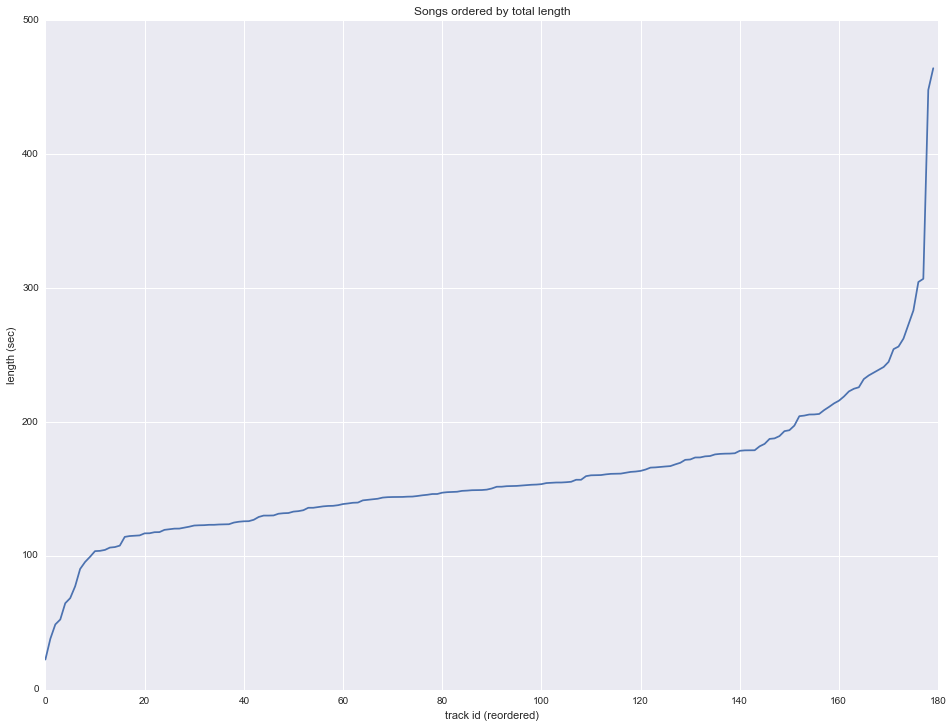

In [176]:
plot(sorted(total_lengths));
title('Songs ordered by total length')
xlabel('track id (reordered)')
ylabel('length (sec)');

In [165]:
total_lengths.describe()

count    180.000000
mean     158.647990
std       54.583595
min       22.575034
25%      130.064463
50%      149.875809
75%      174.831604
max      464.089225
Name: end, dtype: float64

In [187]:
print('shortest song:', total_lengths.min(), 'sec,', song_titles[total_lengths.argmin()])
print('longest song:', total_lengths.max(), 'sec,', song_titles[total_lengths.argmax()])

shortest song: 22.575034 sec, 11 - Abbey Road / 17 - Her Majesty
longest song: 464.089225 sec, 11 - Abbey Road / 06 - I Want You


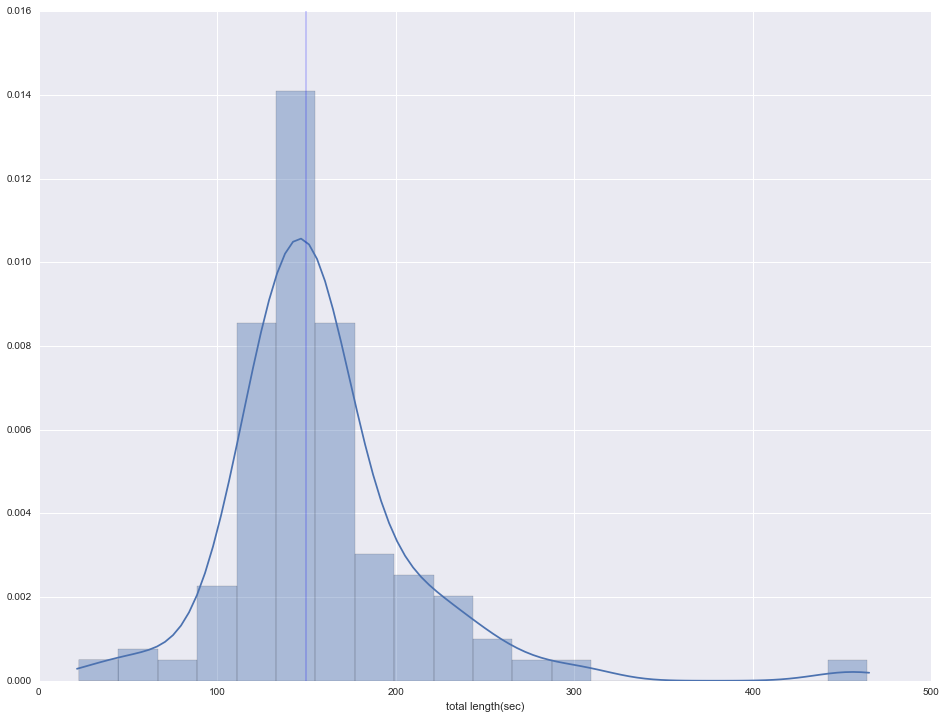

In [220]:
sns.distplot(total_lengths, bins=20)
axvline(total_lengths.median(), alpha=0.2)
xlabel('total length(sec)');

In [227]:
album_lengths = tracks.join(total_lengths).groupby('album_index').sum()['end']
album_lengths

album_index
1              1906.898255
2              1948.634669
3              1775.856763
4              1992.158608
5              2002.499736
6              2094.530854
7              2041.745544
8              2336.650620
9              2154.533333
10             5468.722122
11             2784.524238
12             2049.883403
Name: end, dtype: float64

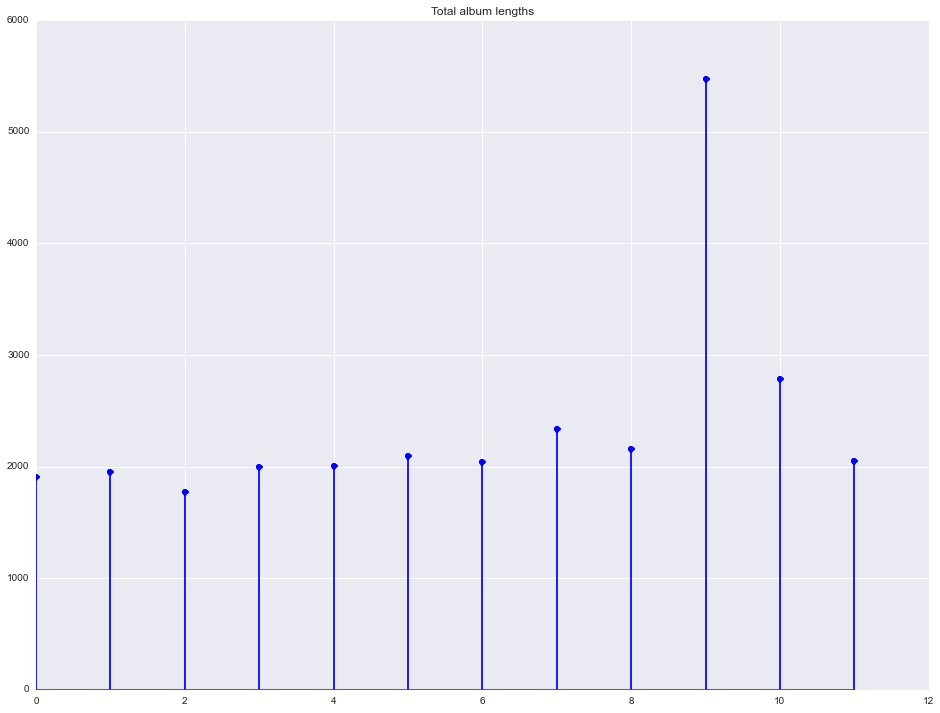

In [231]:
stem(album_lengths)
title('Total album lengths');

In [232]:
chords = df_diff_all['chord'].value_counts()
print('unique chord count:', len(chords))
print('top 20 chords:')
chords[:20]

unique chord count: 407
top 20 chords:


A         1565
G         1383
D         1352
E         1037
C          960
B          502
F          489
A:min      365
E:min      336
Bb         318
B:min      293
F#:min     291
D:min      197
F#         189
C#:min     165
Eb         161
Ab         153
G:7        150
D/5        135
D:7        132
dtype: int64

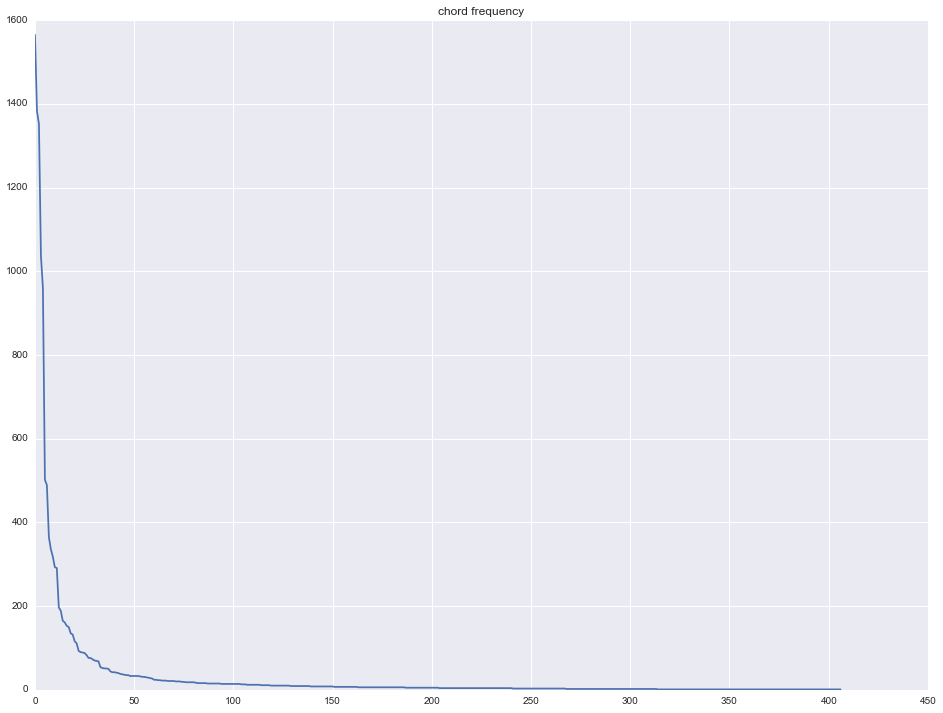

In [233]:
plot(chords)
title('chord frequency');